In [56]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [57]:
def estimate_a(n, gamma, var):
    x = np.random.normal(0, var, n)
    sm = np.sum(x * x)
    l1 = stats.chi2.ppf((1 + gamma) / 2, n)
    l2 = stats.chi2.ppf((1 - gamma) / 2, n)
    return sm / l2 - sm / l1

def estimate_b(n, gamma, var):
    x = np.random.normal(0, var, n)
    mean2 = x.mean() ** 2
    z1 = stats.norm.ppf((3 + gamma) / 4)
    z2 = stats.norm.ppf((3 - gamma) / 4)
    return n * mean2 / (z2 * z2) - n * mean2 / (z1 * z1)

def estimate_mean(f, iters):
    return np.array([f() for i in range(iters)]).mean()

def estimate_a_mean(n, gamma, var, iters=1000):
    return estimate_mean(lambda: estimate_a(n, gamma, var), iters)

def estimate_b_mean(n, gamma, var, iters=1000):
    return estimate_mean(lambda: estimate_b(n, gamma, var), iters)

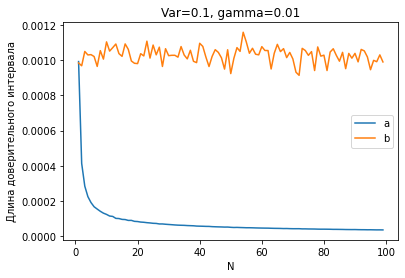

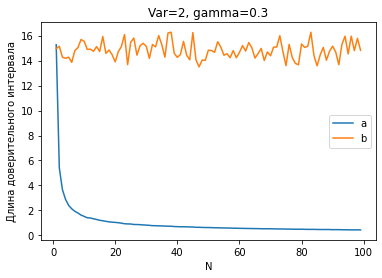

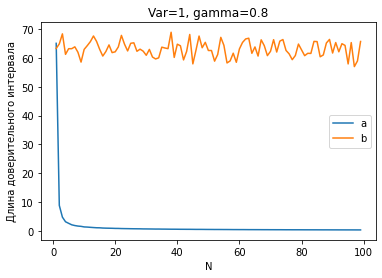

In [58]:
ns = range(1, 100)
gamma_vars = [(0.01, 0.1), (0.3, 2), (0.8, 1)]
for gamma, var in gamma_vars:
    a = [estimate_a_mean(n, gamma, var) for n in ns]
    b = [estimate_b_mean(n, gamma, var) for n in ns]
    plt.plot(ns, a, label="a")
    plt.plot(ns, b, label="b")
    plt.title(f'Var={var}, gamma={gamma}')
    plt.xlabel("N")
    plt.ylabel("Длина доверительного интервала")
    plt.legend()
    plt.show()

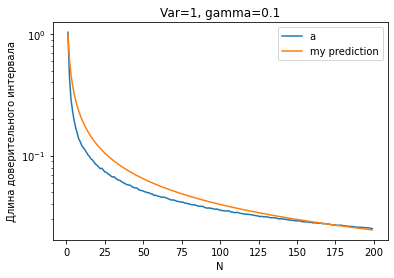

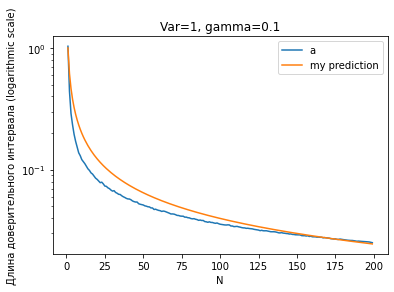

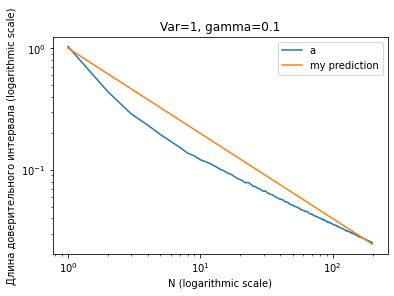

In [59]:
ns = range(1, 200)
gamma = 0.1
var = 1
a = [estimate_a_mean(n, gamma, var) for n in ns]
prediction = [1 / (n ** 0.7) for n in ns]
for i in range(3):
    plt.plot(ns, a, label="a")
    plt.plot(ns, prediction, label="my prediction")
    
    if i > 0:
        plt.yscale('log')
        plt.ylabel('Длина доверительного интервала (logarithmic scale)')
    else:
        plt.ylabel('Длина доверительного интервала')
    if i > 1:
        plt.xlabel('N (logarithmic scale)')
        plt.xscale('log')
    else:
        plt.xlabel('N')
        
    plt.yscale('log')
    plt.title(f'Var={var}, gamma={gamma}')
    plt.legend()
    plt.show()

Длина интервала в методе $(a)$ монотонно убывает к нулю как $x^c$ (для $\gamma = 0.1, \sigma = 1$ подобрал $c \approx 0.7$), а в методе $(b)$ колеблется на одном месте даже при больших n.

Таким образом, оценка $(a)$ лучше.